In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import inf
import time
import pandas as pd
import math
import heapq

###  Imports a number of libraries that provide various functions and tools

The numpy library is used for numerical computing in Python, and is used in this code to generate and manipulate arrays and matrices.

The matplotlib library is used for plotting and visualisation, and is used in this code to visualise the maze and the path through it.

The time library is used to measure the time taken by different parts of the code to run.

The pandas library is used for data manipulation and analysis, and is not used in this code.

The math library is used for mathematical functions and operations, and is not used in this code.

The heapq library is used for implementation of heap queue algorithms, and is not used in this code.

In [10]:
# Below logic is for Heuristic Algorithm

class Heuristic:
    def find_shortest_path(self, weight_matrix, num_rows, game_mode=1):
        # Validate input
        if num_rows < 1 or not isinstance(num_rows, int):
            raise ValueError("Number of rows must be a positive integer.")
        if game_mode not in [1, 2]:
            raise ValueError("Game mode must be 1 or 2.")
        if weight_matrix.shape != (num_rows, num_rows):
            raise ValueError("Weight matrix must be a square matrix with dimensions equal to the number of rows.")

        # Record start time of algorithm
        start_time = time.time()
        
        # Initialize path array and current position variables
        path = np.zeros((num_rows,num_rows), dtype = np.int8)
        current_row, current_col = (0,0)

        # Initialize cost variable
        cost = 0
 
        # Check which game mode is being played
        if game_mode == 1:
            # Iterate through the grid until the target cell is reached
            for i in range((2 * num_rows) - 1):
                # Mark current position in path array and add weight to cost
                path[current_row][current_col] = 1
                cost += weight_matrix[current_row][current_col]

                # Check if the target cell has been reached
                if current_row < num_rows - 1 and current_col < num_rows - 1:  
                    # Calculate the shortest path between adjacent cells
                    if abs(weight_matrix[current_row + 1][current_col]) <= abs(weight_matrix[current_row][current_col + 1]):
                        current_row += 1
                    else:
                        current_col += 1
                # If current row is at bottom of grid and column is not at the end, move to next column
                elif current_row == num_rows - 1 and current_col != num_rows - 1:
                        current_col += 1
                # If current column is at end of grid and row is not at the bottom, move to next row
                elif current_col == num_rows - 1 and current_row != num_rows -1:
                        current_row += 1
        # If game mode is  2, run the following loop
        elif game_mode == 2:
            for i in range(2 * num_rows -1 ):
                # Mark current position in path array and store current position in variables
                path[current_row][current_col] = 1
                prev_row = current_row
                prev_col = current_col
                # Calculate the absolute shortest path between adjacent cells
                if current_row < num_rows - 1  and current_col < num_rows - 1:
                    if abs(weight_matrix[current_row + 1][current_col] - weight_matrix[current_row][current_col]) <= abs(weight_matrix[current_row][current_col + 1] - weight_matrix[current_row][current_col]):
                        current_row += 1
                    else:
                        current_col += 1
                # If current row is at bottom of grid and column is not at the end, move to next column
                elif current_row == num_rows - 1 and current_col != num_rows - 1:
                        current_col += 1
                # If current column is at end of grid and row is not at the bottom, move to next row
                elif current_col == num_rows- 1 and current_row != num_rows - 1:
                        current_row += 1
                cost += abs(weight_matrix[prev_row][prev_col] - weight_matrix[current_row][current_col])
                    
        end_time = time.time()
        return path, cost, round(1000*(end_time - start_time),2)


This code above is a class named Heuristic, which defines a function find_shortest_path that takes in three parameters: a weight matrix, a number of rows, and a game mode. The find_shortest_path function uses a heuristic algorithm to find the shortest path through the weight matrix from the top left cell to the bottom right cell, depending on the game mode specified. The function returns a tuple containing the path array, the cost of the path, and the time taken to find the path. The game modes are defined as follows:

- If game_mode is 1, the function will find the shortest path by moving to the adjacent cell with the lowest absolute weight value.
- If game_mode is 2, the function will find the shortest path by moving to the adjacent cell with the lowest absolute difference in weight value compared to the current cell. The cost of the path is calculated according to the game mode. The time taken to find the path is also recorded and returned in the tuple.


In [11]:
# Dijkstra Algorithm
class Dijkstra: 

    def dijkstra_path(self, matrix, num_rows, game_mode=1):
        # Validate input
        if num_rows < 1 or not isinstance(num_rows, int):
            raise ValueError("Number of rows must be a positive integer.")
        if game_mode not in [1, 2]:
            raise ValueError("Game mode must be 1 or 2.")
        if matrix.shape != (num_rows, num_rows):
            raise ValueError("Weight matrix must be a square matrix with dimensions equal to the number of rows.")

        # Record start time of algorithm
        start_time = time.time()

        # Initialize the graph and costs dictionaries
        graph = {}
        costs = {}
        for x in range(num_rows):
            for y in range(num_rows):
                # Calculate the indices of the surrounding cells
                xm1 = x - 1
                ym1 = y - 1
                xp1 = x + 1
                yp1 = y + 1
                # Initialize the cost for each cell to infinity
                costs[str(x) + str(y)] = float("inf")
                # Create a dictionary for each cell to store its neighbors and their weights
                graph[str(x) + str(y)] = {}
                # Check if the cell above the current cell is within the grid
                above = np.array((xm1, y)) if xm1 >= 0 else np.array((np.nan, np.nan))
                if not np.isnan(above[0]):
                    # Add the cell above as a neighbor with its corresponding weight
                    graph[str(x) + str(y)][str(xm1) + str(y)] = matrix[xm1][y]
                # Check if the cell below the current cell is within the grid
                below = np.array((xp1, y)) if xp1 < num_rows else np.array((np.nan, np.nan))
                if not np.isnan(below[0]):
                    # Add the cell below as a neighbor with its corresponding weight
                    graph[str(x) + str(y)][str(xp1) + str(y)] = matrix[xp1][y]
                # Check if the cell to the left of the current cell is within the grid
                left = np.array((x, ym1)) if ym1 >= 0 else np.array((np.nan, np.nan))
                if not np.isnan(left[0]):
                    # Add the cell to the left as a neighbor with its corresponding weight
                    graph[str(x) + str(y)][str(x) + str(ym1)] = matrix[x][ym1]
                # Check if the cell to the right of the current cell is within the grid
                right = np.array((x, yp1)) if yp1 < num_rows else np.array((np.nan, np.nan))
                if not np.isnan(right[0]):
                    # Add the cell to the right as a neighbor with its corresponding weight
                    graph[str(x) + str(y)][str(x) + str(yp1)] = matrix[x][yp1]
                        # Set the cost for the starting cell to 0
        costs["00"] = matrix[0][0]
        # Initialize the destination and parent dictionaries
        destination = str(num_rows - 1) + str(num_rows - 1)
        parents = {}
        # Perform the search to find the shortest path
        result = self.search("00", destination, graph, costs, parents)
        # Use the parent dictionary to backpedal from the destination to the starting cell to find the shortest path
        spath = self.backpedal("00", destination, result)
        # Initialize the path array
        path = np.zeros((num_rows, num_rows), dtype=np.int8)
        # Mark the cells in the shortest path in the path array
        for choosen in spath:
            path[int(choosen[0])][int(choosen[1])] = 1
        # Initialize the cost variable
        cost = 0
        # Calculate the cost of the path according to the game mode
        if game_mode == 1:
            # In game mode 1, the cost is the sum of the weights of the cells in the path
            for choosen in spath:
                cost += matrix[int(choosen[0])][int(choosen[1])]
        else:
            # In game mode 2, the cost is the absolute difference between the weights of consecutive cells in the path
            for i in range(len(spath) - 1):
                cost += abs(matrix[int(spath[i][0])][int(spath[i][1])] - matrix[int(spath[i+1][0])][int(spath[i+1][1])])
            
            # Calculate the elapsed time
        end_time = time.time()
        elapsed_time = round(1000*(end_time - start_time), 2)
        # Return the path array, cost, and elapsed time
        return path, cost, elapsed_time

    def search(self, start, end, graph, costs, parents):
        # Initialize the priority queue
        queue = []
        # Push the starting cell onto the priority queue with a priority of 0
        heapq.heappush(queue, (0, start))
        # Continue the search as long as the priority queue is not empty
        while queue:
            # Pop the cell with the lowest cost from the priority queue
            cost, cell = heapq.heappop(queue)
            # Check if the cell is the destination
            if cell == end:
                # Return the found path
                return parents
            # Iterate through the cell's neighbors
            for neighbor in graph[cell]:
                # Calculate the new cost to reach the neighbor
                new_cost = cost + graph[cell][neighbor]
                # If the new cost is lower than the neighbor's current cost, update the cost and set the parent of the neighbor to the current cell
                if new_cost < costs[neighbor]:
                    costs[neighbor] = new_cost
                    parents[neighbor] = cell
                    # Push the neighbor onto the priority queue with its updated cost as the priority
                    heapq.heappush(queue, (new_cost, neighbor))
        # Return an empty path if the destination was not reached
        return {}

    def backpedal(self, start, end, parents):
        # Create a list to store the path
        path = []
        # Set the current cell to the end
        current = end
        # Continue the loop until the start is reached
        while current != start:
            # Append the current cell to the path
            path.append(current)
            # Set the current cell to its parent
            current = parents[current]
        # Append the starting cell to the path
        path.append(start)
        # Return the path reversed (from start to end)
        return path[::-1]



The code above is a class for Dijkstra's algorithm for finding the shortest path in a maze. The class has a method called dijkstra_path, which takes in a weight matrix representing the maze, the number of rows in the matrix, and a game mode. It first performs some input validation, checking that the number of rows is a positive integer and the game mode is either 1 or 2 and that the weight matrix is a square matrix with dimensions equal to the number of rows. It then initialises the graph and costs dictionaries, which will be used to store the neighbours and weights of each cell, and the costs of reaching each cell, respectively. It then sets the cost for the starting cell to 0. It initialises the destination and parent dictionaries, which will be used to store the final destination cell and the parent of each cell in the shortest path, respectively. It then calls the search method to find the shortest path and the backpedal method to trace the path from the destination to the starting cell. It then initialises the path array, marks the cells in the shortest path in the path array, and calculates the cost of the path according to the game mode. Finally, it returns the path array, the cost, and the time taken to find the shortest path.

The Dijkstra algorithm implemented in this code uses a simple priority queue to find the shortest path through the maze. The priority queue is implemented using the heapq library, which provides functions for inserting and extracting elements from a priority queue. In this implementation, the priority queue stores the nodes of the graph that have been visited but not yet processed, with the cost of reaching each node as the priority. The algorithm continually selects the node with the lowest cost from the priority queue, updates the costs of its neighbours, and adds them to the queue until the destination is reached. This process continues until the destination node has been processed or the priority queue is empty. At this point, the algorithm terminates, and the shortest path is reconstructed using the backpedal function.


Enter the size of the grid: 14


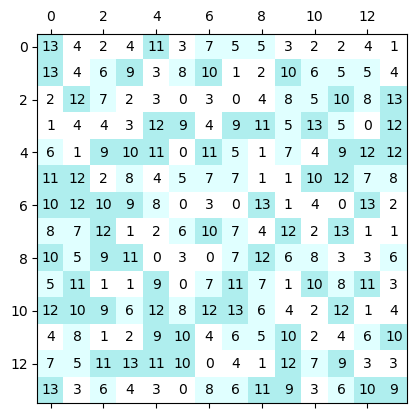

Algorithm Mode: Enter 1 for Heuristic Algorithm or 2 for Dijkstra's Algorithm: 1
Game mode: Enter 1 or 2 to select: 1


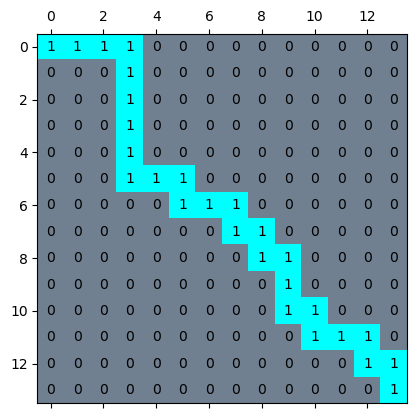

In [19]:
# Define a function to visualise the maze with time associated with each cell
def show_maze(weight_matrix):
    fig, ax = plt.subplots()
    # Use the matshow method of the axis object to visualise the weight_matrix as an image
    # Use a color map with three colors: white, light cyan, and paleturquoise
    ax.matshow(weight_matrix, cmap=mpl.colors.ListedColormap(['white', 'lightcyan', 'paleturquoise']))
    for (i, j), z in np.ndenumerate(weight_matrix):
        ax.text(j, i, '{:d}'.format(z), ha='center', va='center')
    plt.show()
    
def visualize_path(path):
    fig, ax = plt.subplots()
    # Use the text method of the axis object to add a text label to the element
    ax.matshow(path, cmap=mpl.colors.ListedColormap(['slategrey', 'cyan']))
    for (i, j), z in np.ndenumerate(path):
        # The ha and va arguments specify the horizontal and vertical alignment of the text, respectively
        ax.text(j, i, '{:d}'.format(z), ha='center', va='center')
    plt.show()
    
# Read the size of the maze from the user
size_of_maze = int(input("Enter the size of the grid: "))

# Generate a random weight matrix with the given size
weight_matrix = np.random.randint(size_of_maze, size = (size_of_maze, size_of_maze))

# Visualise the maze with the weight matrix
show_maze(weight_matrix)

# Read the choice of algorithm mode from the user
algorithm_mode = int(input("Algorithm Mode: Enter 1 for Heuristic Algorithm or 2 for Dijkstra's Algorithm: "))
# Read the choice of game mode from the user
game_mode = int(input("Game mode: Enter 1 or 2 to select: "))

# Check the algorithm mode chosen by the user
if algorithm_mode == 1:
    # If the user chose the Heuristic algorithm, create a Heuristic object
    hr = Heuristic()
    # Find the shortest path using the Heuristic algorithm
    result = hr.find_shortest_path(weight_matrix, size_of_maze, game_mode)
    # Unpack the result tuple into separate variables
    path, cost, tm = result
else:
    # If the user chose Dijkstra's algorithm, create a Dijkstra object
    dj = Dijkstra()
    # Find the shortest path using Dijkstra's algorithm
    result = dj.dijkstra_path(weight_matrix, size_of_maze, game_mode)
    # Unpack the result tuple into separate variables
    path, cost, tm = result

# Visualise the path through the maze
visualize_path(path)


cost_list = []
time_list = []
cost_list.append(cost)

This code above implements the two algorithms above to find the shortest path through a maze represented by a 2D weight matrix. The user is prompted to enter the size of the grid and the desired algorithm mode (either Heuristic or Dijkstra's). The grid is generated with random weights and visualised using matplotlib. The user is also prompted to select a game mode (either 1 or 2). The chosen algorithm is then used to find the shortest path through the maze, with the cost and time taken is calculated and stored in variables. The resulting path is then visualised using matplotlib. The cost of the path is added to a list of costs, and the time taken is added to a list of times.

It defines two functions: show_maze and visualize_path. The show_maze function takes in a 2D array called weight_matrix and displays a visual representation of the maze, with the time associated with each cell. The visualize_path function takes in a 2D array called path and displays a visual representation of the path through the maze. The code then reads the maze size from the user, generates a random weight matrix with the given size, and visualises the maze with the show_maze function. It then reads the user's choice of algorithm mode and game mode and uses an if statement to determine which algorithm to use to find the shortest path through the maze. The code then calls the visualize_path function to display the path through the maze and creates two empty lists: cost_list and time_list. It then appends the cost variable to the cost_list.


In [18]:
#Statistic of the PATH


# Calculate the mean and standard deviation of the cost
mean_cost = np.mean(cost_list)
std_cost = np.std(cost_list)

# Calculate the mean and standard deviation of the time taken
mean_time = np.mean(time_list)
std_time = np.std(time_list)

# Print the results
print("Mean cost:", mean_cost)
print("Standard deviation of cost:", std_cost)
print("Mean time taken:", mean_time)
print("Standard deviation of time taken:", std_time)


Mean cost: 128.0
Standard deviation of cost: 0.0
Mean time taken: nan
Standard deviation of time taken: nan


The code above calculates and displays some statistics about the path through the maze. It calculates the mean and standard deviation of the cost and time taken to find the shortest path, and prints the results.

The np.mean function from the NumPy library is used to calculate the mean of the cost_list and time_list lists. The np.std function is used to calculate the standard deviation of these lists. The print function is then used to display the results.

The mean and standard deviation are commonly used statistical measures that provide information about the central tendency and dispersion of a dataset. The mean is the average of the values in the dataset, and the standard deviation is a measure of how spread out the values are. A small standard deviation indicates that the values are close to the mean, while a large standard deviation indicates that the values are more spread out.

In [17]:
import numpy as np
import statistics
import time

# Number of trials to run for each algorithm
trials = 100

# Array to store runtimes for each trial of each algorithm
heuristic_runtimes = []

# Generate random weight matrices for testing
weight_matrices = [np.random.randint(-100, 100, size=(5,5)) for i in range(trials)]

# Initialize instances of Heuristic
heuristic = Heuristic()

# Test Heuristic algorithm
for i, weight_matrix in enumerate(weight_matrices):
    start_time = time.time()
    heuristic.find_shortest_path(weight_matrix, 5)
    end_time = time.time()
    heuristic_runtimes.append(end_time - start_time)

# Calculate mean and standard deviation of runtimes for the algorithm
heuristic_mean = statistics.mean(heuristic_runtimes)
heuristic_stdev = statistics.stdev(heuristic_runtimes)

# Print results
print(f"Heuristic algorithm: mean runtime = {heuristic_mean:.5f} seconds, standard deviation = {heuristic_stdev:.5f} seconds")

Heuristic algorithm: mean runtime = 0.00002 seconds, standard deviation = 0.00014 seconds


This code performs some tests on the Heuristic algorithm. It generates 100 random 5x5 weight matrices, and then it uses the Heuristic algorithm to find the shortest path through each one. It measures the time it takes to run the algorithm for each weight matrix, and then it calculates the mean and standard deviation of the runtimes. It finally prints the mean runtime and standard deviation of the runtimes.

In [32]:
# Number of trials to run for each algorithm
trials = 10

# Array to store runtimes for each trial of each algorithm
dijkstra_runtimes = []

# Generate random weight matrices for testing
weight_matrices = [np.random.randint(-100, 100, size=(5,5)) for i in range(trials)]

# Initialize instances of Heuristic and Dijikstra classes
dijkstra = Dijkstra()

# Test Dijkstra algorithm
for i, weight_matrix in enumerate(weight_matrices):
    start_time = time.time()
    dijkstra.dijkstra_path(weight_matrix, 5)
    end_time = time.time()
    dijkstra_runtimes.append(end_time - start_time)

# Calculate mean and standard deviation of runtimes for the algorithm
dijkstra_mean = statistics.mean(dijkstra_runtimes)
dijkstra_stdev = statistics.stdev(dijkstra_runtimes)

# Print results
print(f"Dijkstra algorithm: mean runtime = {dijkstra_mean:.5f} seconds, standard deviation = {dijkstra_stdev:.5f} seconds")

C:\Users\kanso\AppData\Local\Temp\ipykernel_28264\1279930915.py:98: RuntimeWarning: overflow encountered in long_scalars
  new_cost = cost + graph[cell][neighbor]


MemoryError: 

The code above first initialises an array to store the runtimes of the algorithm and generates a list of random weight matrices to use as input for the algorithm. It then initialises an instance of a Dijkstra class, which is assumed to contain an implementation of the Dijkstra algorithm.

Next, the code runs the Dijkstra algorithm on each weight matrices, measuring the time it takes to run each trial and storing the results in the dijkstra_runtimes array. Finally, it calculates the mean and standard deviation of the runtimes and prints the results.


# Refrences 

Garangean, T., Tony GarangeanTony Garangean                    9711 gold badge11 silver badge66 bronze badges and cwebcweb                    36222 silver badges1111 bronze badges (1962) Python - grids, random integers in cells, Stack Overflow. Available at: https://stackoverflow.com/questions/28963122/python-grids-random-integers-in-cells. 